Load all packages you need.

In [1]:
import pandas as pd

Read the data.

In [7]:
df = pd.read_csv("/Users/davidsuss/Documents/GitHub/Applied-Analytics/data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Inspect the histogram of "BloodPressure". What could be outlier values?


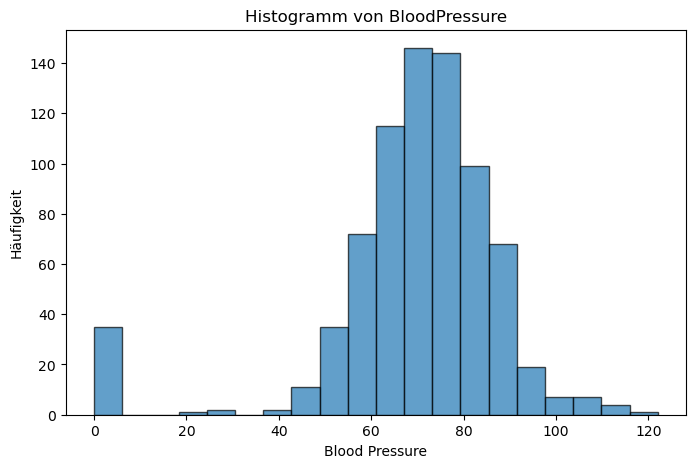

In [6]:
import matplotlib.pyplot as plt

# Histogramm für die Variable BloodPressure
plt.figure(figsize=(8, 5))
plt.hist(df['BloodPressure'], bins=20, edgecolor='black', alpha=0.7)

# Titel und Achsenbeschriftung
plt.title('Histogramm von BloodPressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Häufigkeit')

# Diagramm anzeigen
plt.show()

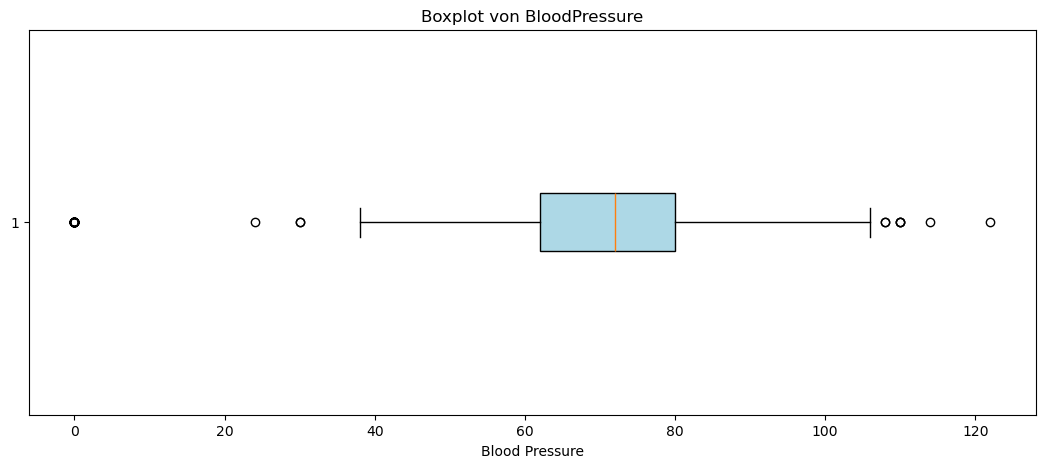

In [12]:
import matplotlib.pyplot as plt

# Boxplot für die Variable BloodPressure
plt.figure(figsize=(13, 5))
plt.boxplot(df['BloodPressure'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Titel und Achsenbeschriftung
plt.title('Boxplot von BloodPressure')
plt.xlabel('Blood Pressure')

# Diagramm anzeigen
plt.show()


Do you think the zero values are an outlier or missing data? How would the histogram look like without the zero values? Are there still outlier visible?

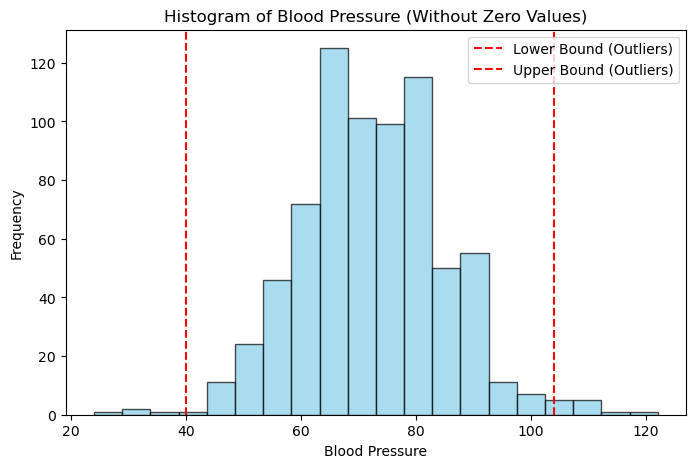

Outliers in BloodPressure (Without Zero Values):
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
18             1      103             30             38       83  43.3   
43             9      171            110             24      240  45.4   
84             5      137            108              0        0  48.8   
106            1       96            122              0        0  22.4   
125            1       88             30             42       99  55.0   
177            0      129            110             46      130  67.1   
362            5      103            108             37        0  39.2   
549            4      189            110             31        0  28.5   
597            1       89             24             19       25  27.8   
599            1      109             38             18      120  23.1   
658           11      127            106              0        0  39.0   
662            8      167            106             46      23

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Remove zero values from BloodPressure
df_no_zeros = df[df["BloodPressure"] > 0]

# Calculate Tukey's fences again without zero values
Q1_no_zeros = df_no_zeros["BloodPressure"].quantile(0.25)
Q3_no_zeros = df_no_zeros["BloodPressure"].quantile(0.75)
IQR_no_zeros = Q3_no_zeros - Q1_no_zeros

lower_bound_no_zeros = Q1_no_zeros - 1.5 * IQR_no_zeros
upper_bound_no_zeros = Q3_no_zeros + 1.5 * IQR_no_zeros

# Create a histogram without zero values
plt.figure(figsize=(8, 5))
plt.hist(df_no_zeros["BloodPressure"], bins=20, edgecolor='black', alpha=0.7, color='skyblue')

# Mark outlier boundaries
plt.axvline(lower_bound_no_zeros, color='red', linestyle='dashed', label='Lower Bound (Outliers)')
plt.axvline(upper_bound_no_zeros, color='red', linestyle='dashed', label='Upper Bound (Outliers)')

# Labels and title
plt.title('Histogram of Blood Pressure (Without Zero Values)')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

# Identify and display outliers in the updated dataset
outliers_no_zeros = df_no_zeros[
    (df_no_zeros["BloodPressure"] < lower_bound_no_zeros) | (df_no_zeros["BloodPressure"] > upper_bound_no_zeros)
]

# Display outliers
print("Outliers in BloodPressure (Without Zero Values):")
print(outliers_no_zeros)


Let's use some more fine-grained methods to detect outlier. Create a Boxplot of "BloodPressure" and see if Tukey's fence reveals outlier!

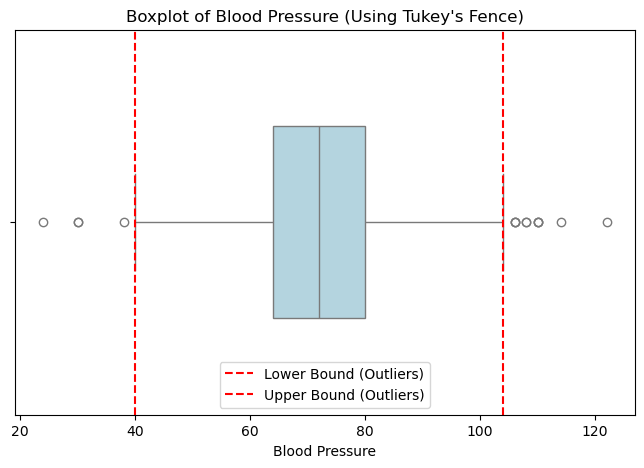

Detected Outliers in Blood Pressure (Using Tukey's Fence):
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
18             1      103             30             38       83  43.3   
43             9      171            110             24      240  45.4   
84             5      137            108              0        0  48.8   
106            1       96            122              0        0  22.4   
125            1       88             30             42       99  55.0   
177            0      129            110             46      130  67.1   
362            5      103            108             37        0  39.2   
549            4      189            110             31        0  28.5   
597            1       89             24             19       25  27.8   
599            1      109             38             18      120  23.1   
658           11      127            106              0        0  39.0   
662            8      167            106             

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Remove zero values from BloodPressure for better outlier detection
df_no_zeros = df[df["BloodPressure"] > 0]

# Calculate Tukey's fences again without zero values
Q1_no_zeros = df_no_zeros["BloodPressure"].quantile(0.25)
Q3_no_zeros = df_no_zeros["BloodPressure"].quantile(0.75)
IQR_no_zeros = Q3_no_zeros - Q1_no_zeros

lower_bound_no_zeros = Q1_no_zeros - 1.5 * IQR_no_zeros
upper_bound_no_zeros = Q3_no_zeros + 1.5 * IQR_no_zeros

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_zeros["BloodPressure"], color='lightblue', width=0.5)

# Mark outlier boundaries using Tukey's Fence
plt.axvline(lower_bound_no_zeros, color='red', linestyle='dashed', label='Lower Bound (Outliers)')
plt.axvline(upper_bound_no_zeros, color='red', linestyle='dashed', label='Upper Bound (Outliers)')

# Labels and title
plt.title('Boxplot of Blood Pressure (Using Tukey\'s Fence)')
plt.xlabel('Blood Pressure')
plt.legend()

# Show plot
plt.show()

# Identify and display outliers detected by Tukey's Fence
outliers_no_zeros = df_no_zeros[
    (df_no_zeros["BloodPressure"] < lower_bound_no_zeros) | (df_no_zeros["BloodPressure"] > upper_bound_no_zeros)
]

# Print detected outliers
print("Detected Outliers in Blood Pressure (Using Tukey's Fence):")
print(outliers_no_zeros)


Can you think of a way to visualize the ±3SD method to detect outlier?

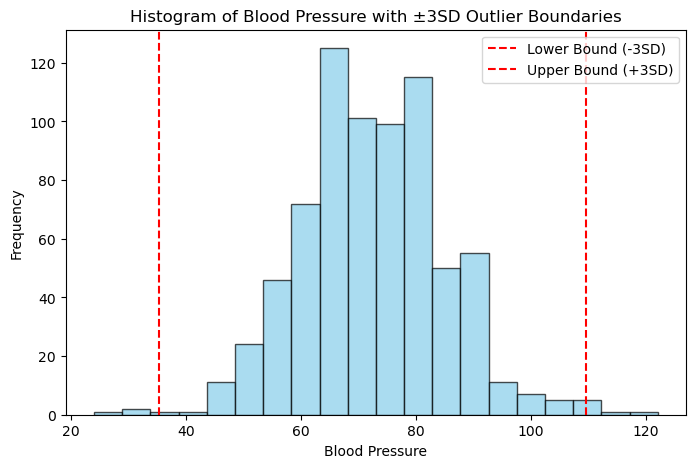

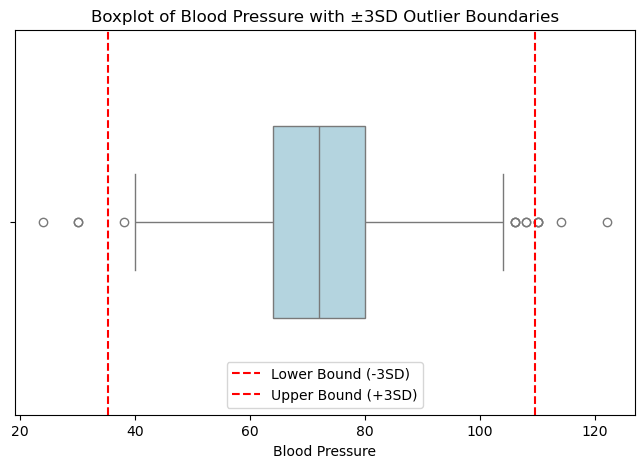

Detected Outliers in Blood Pressure (±3SD):
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
18             1      103             30             38       83  43.3   
43             9      171            110             24      240  45.4   
106            1       96            122              0        0  22.4   
125            1       88             30             42       99  55.0   
177            0      129            110             46      130  67.1   
549            4      189            110             31        0  28.5   
597            1       89             24             19       25  27.8   
691           13      158            114              0        0  42.3   

     DiabetesPedigreeFunction  Age  Outcome  
18                      0.183   33        0  
43                      0.721   54        1  
106                     0.207   27        0  
125                     0.496   26        1  
177                     0.319   26        1  
549          

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Remove zero values from BloodPressure for better outlier detection
df_no_zeros = df[df["BloodPressure"] > 0]

# Calculate mean and standard deviation
mean_bp = df_no_zeros["BloodPressure"].mean()
std_bp = df_no_zeros["BloodPressure"].std()

# Define outlier boundaries (±3 Standard Deviations)
lower_bound_3sd = mean_bp - 3 * std_bp
upper_bound_3sd = mean_bp + 3 * std_bp

# Create a histogram with ±3SD boundaries
plt.figure(figsize=(8, 5))
plt.hist(df_no_zeros["BloodPressure"], bins=20, edgecolor='black', alpha=0.7, color='skyblue')

# Mark ±3SD boundaries
plt.axvline(lower_bound_3sd, color='red', linestyle='dashed', label='Lower Bound (-3SD)')
plt.axvline(upper_bound_3sd, color='red', linestyle='dashed', label='Upper Bound (+3SD)')

# Labels and title
plt.title('Histogram of Blood Pressure with ±3SD Outlier Boundaries')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

# Create a boxplot with ±3SD boundaries
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_zeros["BloodPressure"], color='lightblue', width=0.5)

# Mark ±3SD boundaries
plt.axvline(lower_bound_3sd, color='red', linestyle='dashed', label='Lower Bound (-3SD)')
plt.axvline(upper_bound_3sd, color='red', linestyle='dashed', label='Upper Bound (+3SD)')

# Labels and title
plt.title('Boxplot of Blood Pressure with ±3SD Outlier Boundaries')
plt.xlabel('Blood Pressure')
plt.legend()

# Show plot
plt.show()

# Identify and display outliers detected by the ±3SD method
outliers_3sd = df_no_zeros[
    (df_no_zeros["BloodPressure"] < lower_bound_3sd) | (df_no_zeros["BloodPressure"] > upper_bound_3sd)
]

# Print detected outliers
print("Detected Outliers in Blood Pressure (±3SD):")
print(outliers_3sd)


Are the outliers detected by Tukey's Fence and ±3SD method identical? Test it!

In [16]:
import pandas as pd

# Ensure zero values are removed for better outlier detection
df_no_zeros = df[df["BloodPressure"] > 0]

# Calculate Tukey's Fence outlier boundaries
Q1_no_zeros = df_no_zeros["BloodPressure"].quantile(0.25)
Q3_no_zeros = df_no_zeros["BloodPressure"].quantile(0.75)
IQR_no_zeros = Q3_no_zeros - Q1_no_zeros

lower_bound_tukey = Q1_no_zeros - 1.5 * IQR_no_zeros
upper_bound_tukey = Q3_no_zeros + 1.5 * IQR_no_zeros

# Calculate ±3SD outlier boundaries
mean_bp = df_no_zeros["BloodPressure"].mean()
std_bp = df_no_zeros["BloodPressure"].std()

lower_bound_3sd = mean_bp - 3 * std_bp
upper_bound_3sd = mean_bp + 3 * std_bp

# Identify outliers using Tukey's Fence
outliers_tukey = df_no_zeros[
    (df_no_zeros["BloodPressure"] < lower_bound_tukey) | (df_no_zeros["BloodPressure"] > upper_bound_tukey)
]

# Identify outliers using ±3SD method
outliers_3sd = df_no_zeros[
    (df_no_zeros["BloodPressure"] < lower_bound_3sd) | (df_no_zeros["BloodPressure"] > upper_bound_3sd)
]

# Compare the outliers detected by both methods
common_outliers = outliers_tukey.index.intersection(outliers_3sd.index)
only_tukey = outliers_tukey.drop(index=common_outliers, errors='ignore')
only_3sd = outliers_3sd.drop(index=common_outliers, errors='ignore')

# Display results
print("✅ Common Outliers Detected by Both Methods:")
print(df_no_zeros.loc[common_outliers])

print("\n✅ Outliers Only Detected by Tukey's Fence:")
print(only_tukey)

print("\n✅ Outliers Only Detected by ±3SD:")
print(only_3sd)


✅ Common Outliers Detected by Both Methods:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
18             1      103             30             38       83  43.3   
43             9      171            110             24      240  45.4   
106            1       96            122              0        0  22.4   
125            1       88             30             42       99  55.0   
177            0      129            110             46      130  67.1   
549            4      189            110             31        0  28.5   
597            1       89             24             19       25  27.8   
691           13      158            114              0        0  42.3   

     DiabetesPedigreeFunction  Age  Outcome  
18                      0.183   33        0  
43                      0.721   54        1  
106                     0.207   27        0  
125                     0.496   26        1  
177                     0.319   26        1  
549          